# Visual Pipelines for Text Analysis 

June 25, 2017 &middot; Data Intelligence Conference &middot; Capitol One

## Visual Sentiment Analysis 

In [12]:
%matplotlib notebook

In [28]:
# Imports
import sys 
sys.path.append("/Users/benjamin/Repos/ddl/yellowbrick")

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassBalance
from yellowbrick.classifier import ConfusionMatrix 
from yellowbrick.classifier import ROCAUC 
from yellowbrick.text import PosTagVisualizer

In [5]:
# Load the Amazon reviews of patio, lawn, and garden equipment
# Reviews include both text and rating on a 1-5 scale
# Source: http://jmcauley.ucsd.edu/data/amazon/

def get_reviews(path):
    my_file = open(path, 'r')
    for review in my_file:
        content = eval(review)
        yield (content["reviewText"],content["overall"])

texts, ratings = zip(*list(get_reviews('fixtures/reviews_Patio_Lawn_and_Garden_5.json')))

In [29]:
# We'd like to use the text of the reviews to predict the numeric rating
# Use term frequency-inverse document frequency to encode the texts

X = list(texts)
# tfidf     = TfidfVectorizer()
tfidf = CountVectorizer()
X_encoded = tfidf.fit_transform(X)

In [7]:
# Our target is the numeric ratings, which are provided on a 1-5 scale
# We'll map the rating scale to a binary one, where a rating of 5 is
# "positive" and a rating below 5 is "negative"

y = list(ratings)
y_mapped  = []
for value in y:
    if value >= 5.0:
        y_mapped.append('pos')
    else:
        y_mapped.append('neg')

In [8]:
# Create training and test splits for cross validation

splits = train_test_split(X_encoded, y_mapped, test_size=0.2)
X_train, X_test, y_train, y_test = splits

<IPython.core.display.Javascript object>


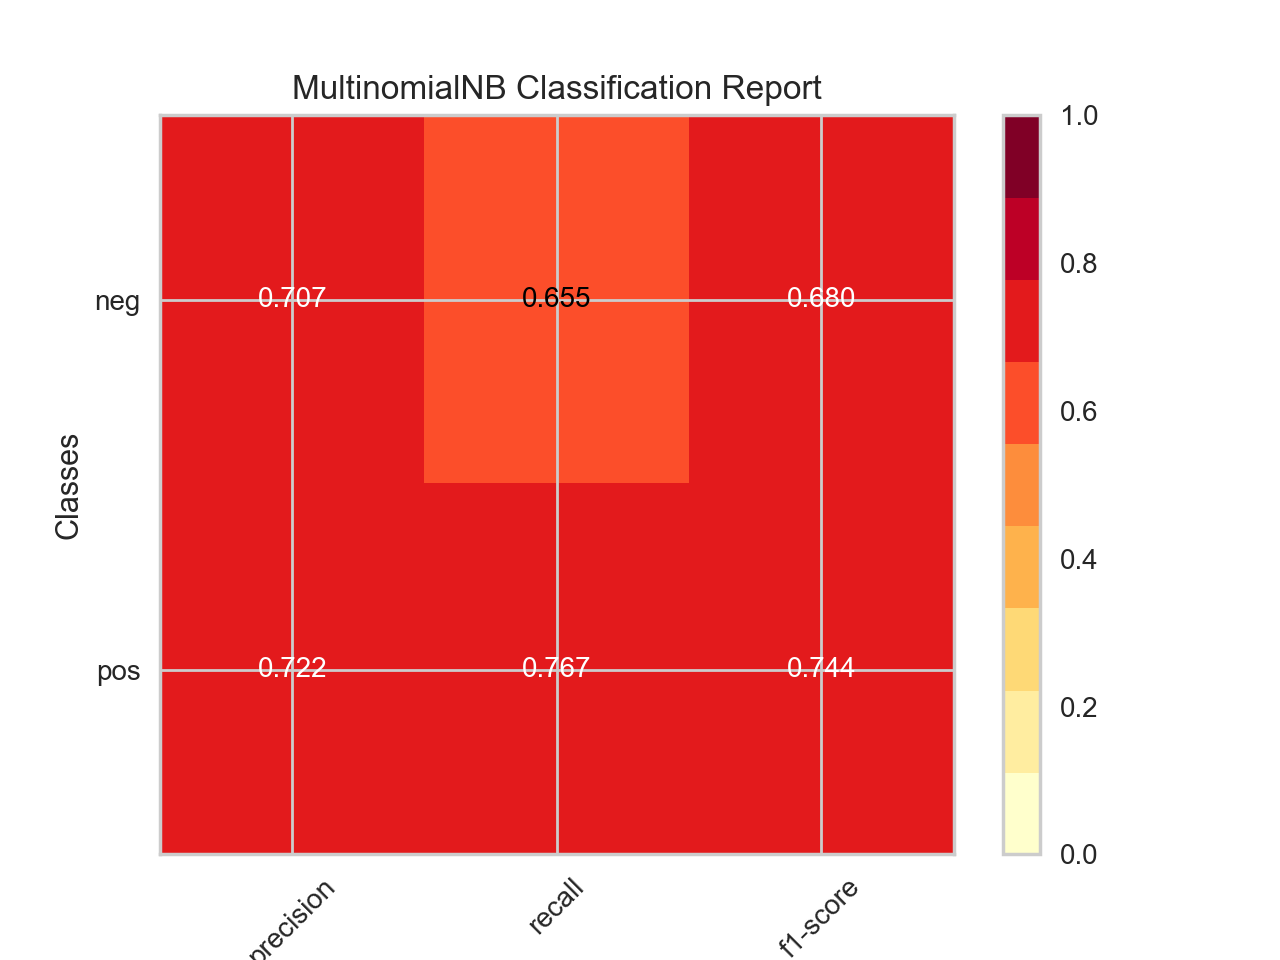

In [13]:
# Train a Multinomial Naive Bayes model and use Yellowbrick to visualize
# the fitted model's success at predicting "positive" (5-star) ratings

visualizer = ClassificationReport(MultinomialNB())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<IPython.core.display.Javascript object>


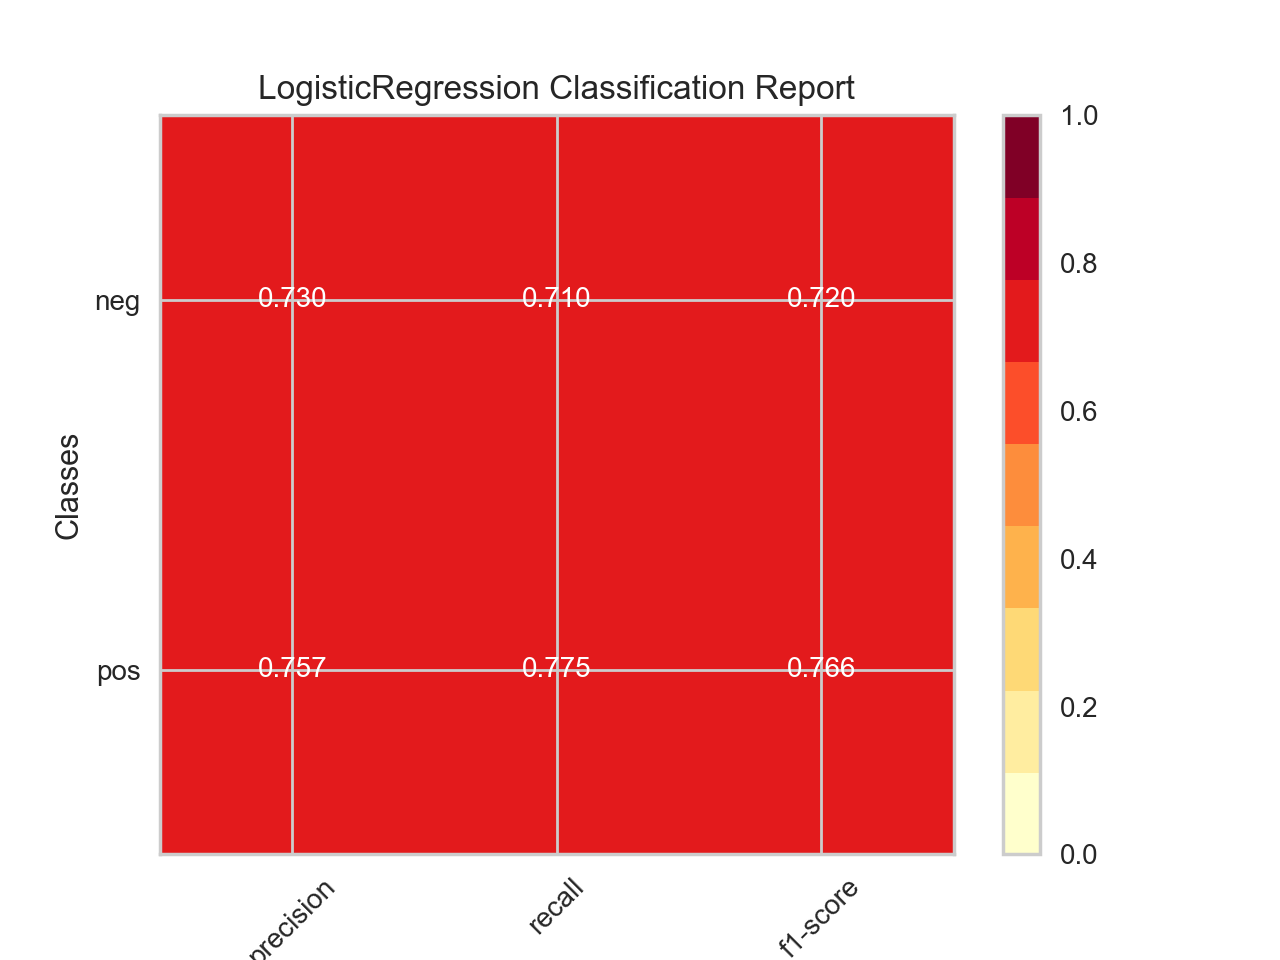

In [14]:
# Train a Multinomial Naive Bayes model and use Yellowbrick to visualize
# the fitted model's success at predicting "positive" (5-star) ratings

visualizer = ClassificationReport(LogisticRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<IPython.core.display.Javascript object>


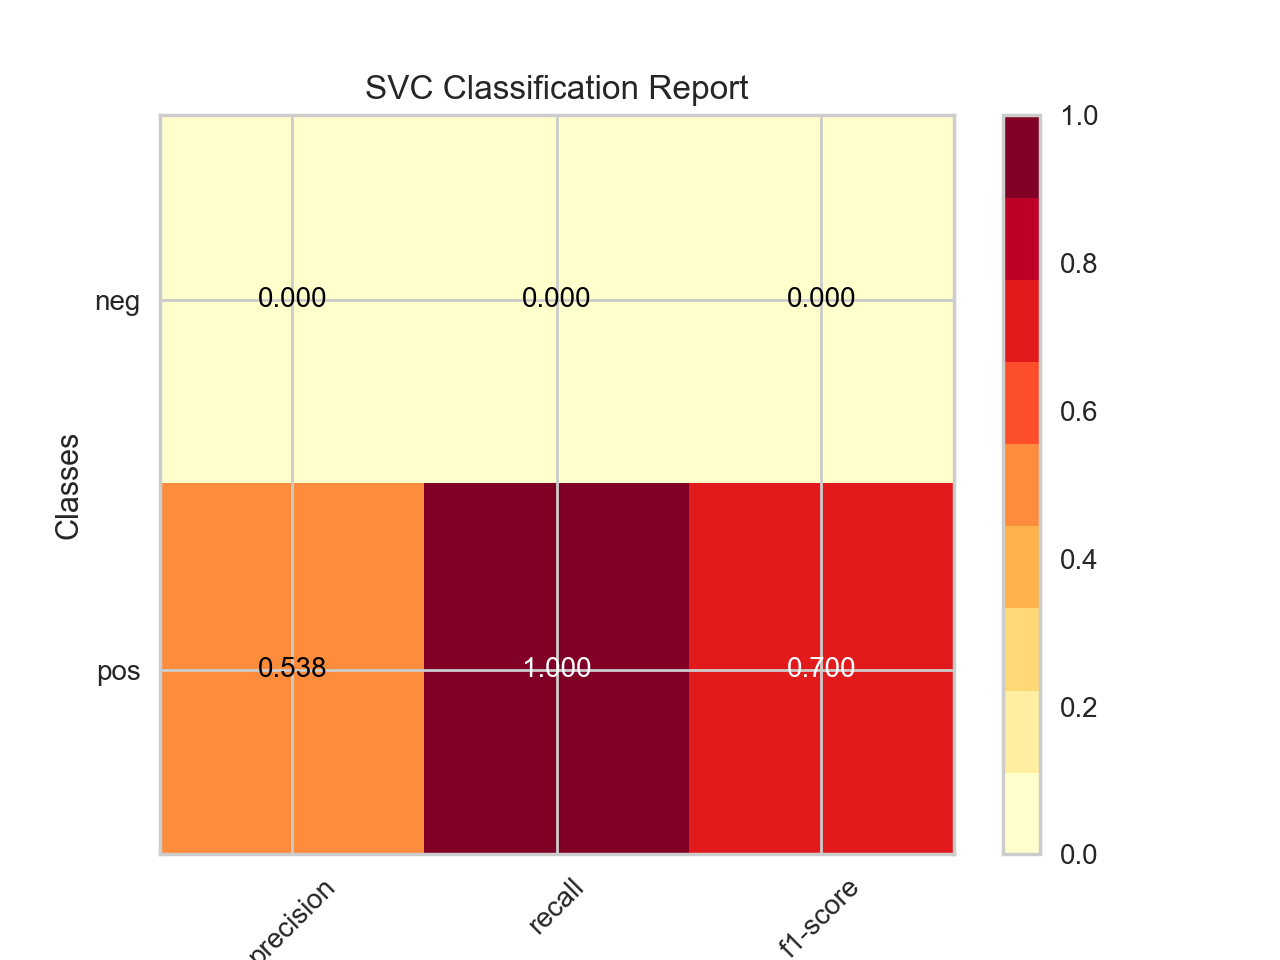

In [17]:
# Train a Multinomial Naive Bayes model and use Yellowbrick to visualize
# the fitted model's success at predicting "positive" (5-star) ratings

visualizer = ClassificationReport(SVC())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<IPython.core.display.Javascript object>


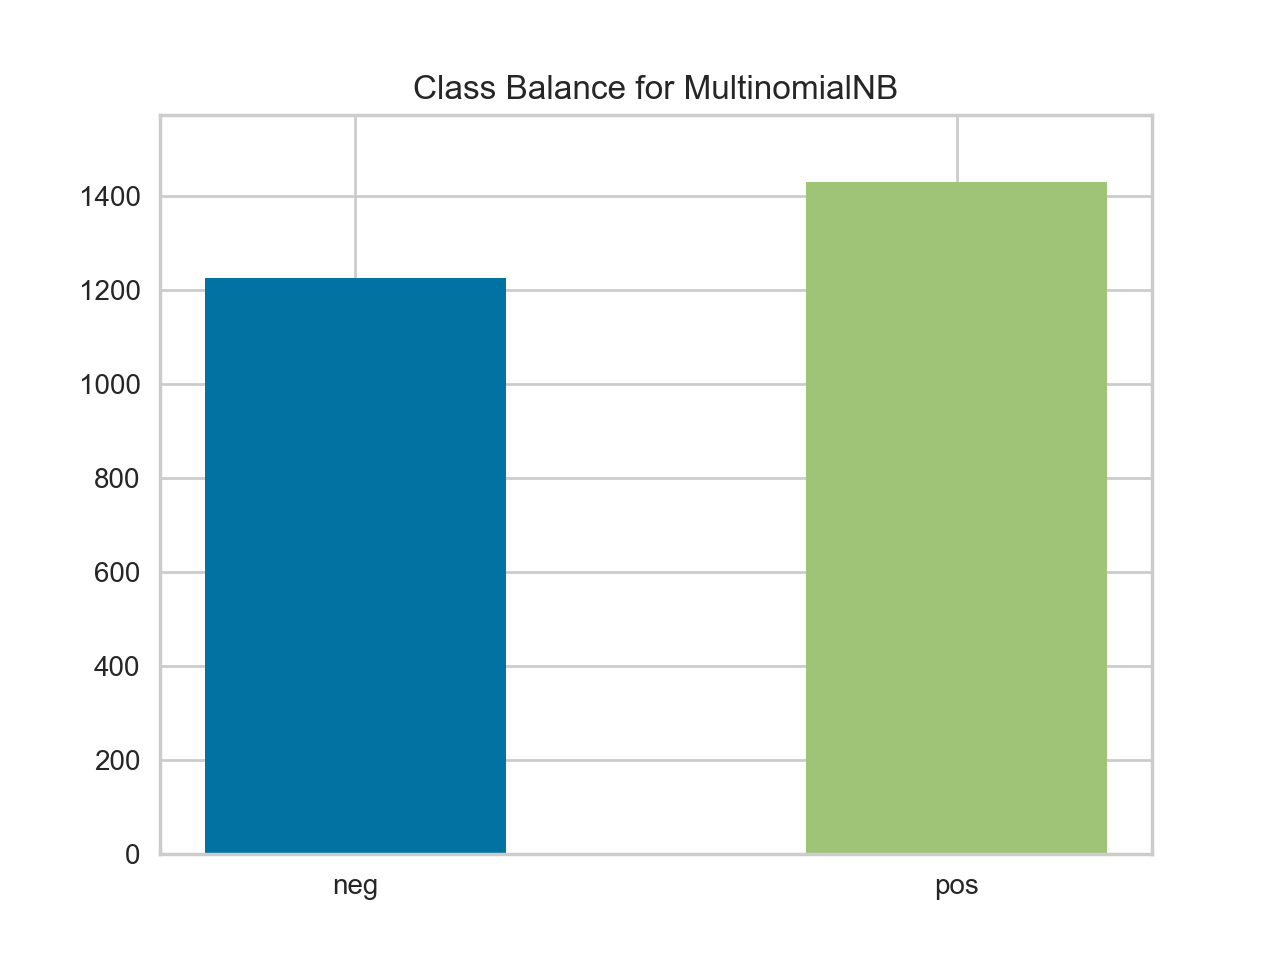

In [18]:
visualizer = ClassBalance(MultinomialNB())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<IPython.core.display.Javascript object>


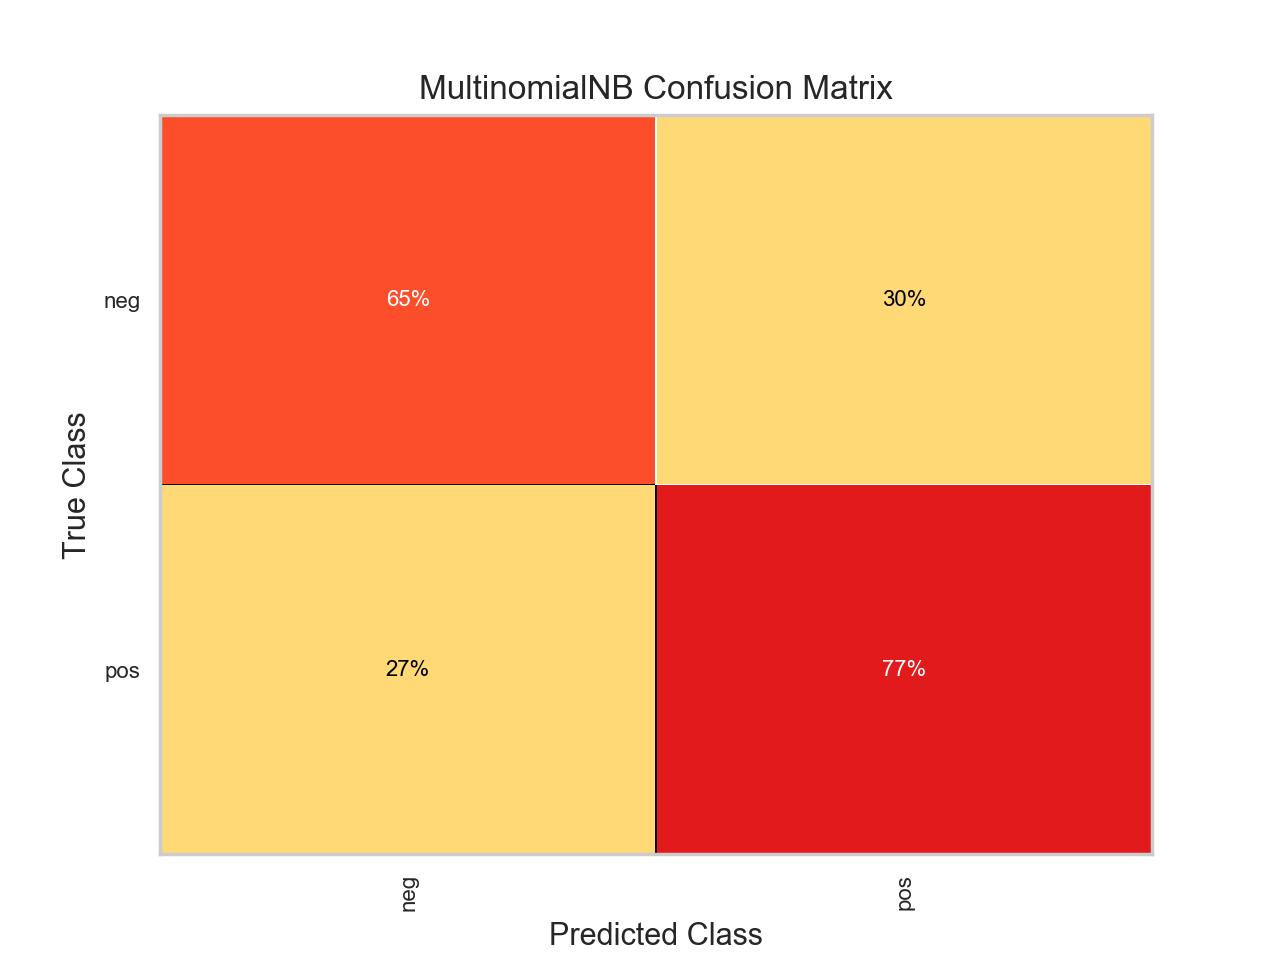

In [19]:
visualizer = ConfusionMatrix(MultinomialNB())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<IPython.core.display.Javascript object>


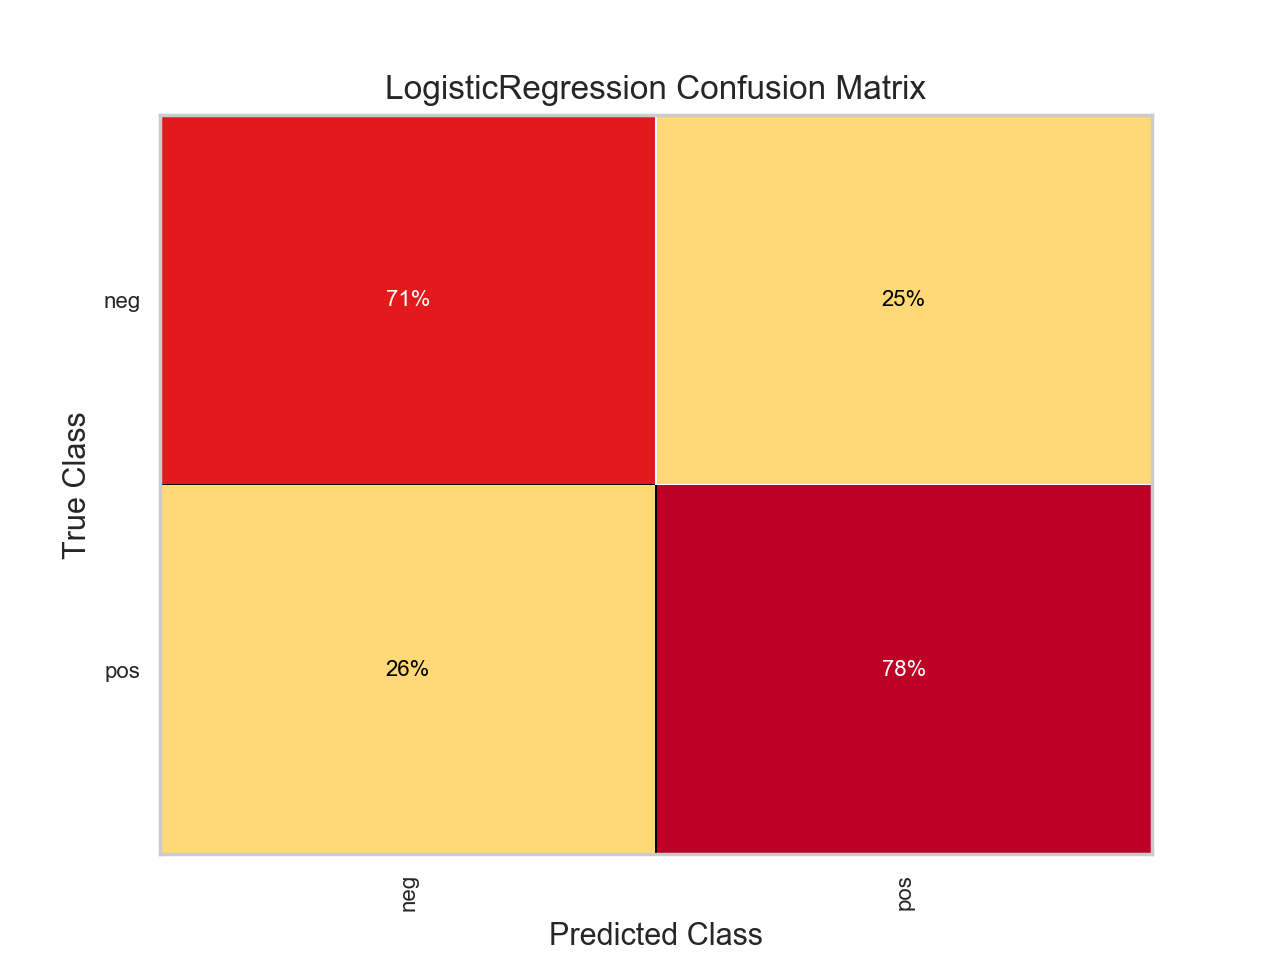

In [21]:
visualizer = ConfusionMatrix(LogisticRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<IPython.core.display.Javascript object>


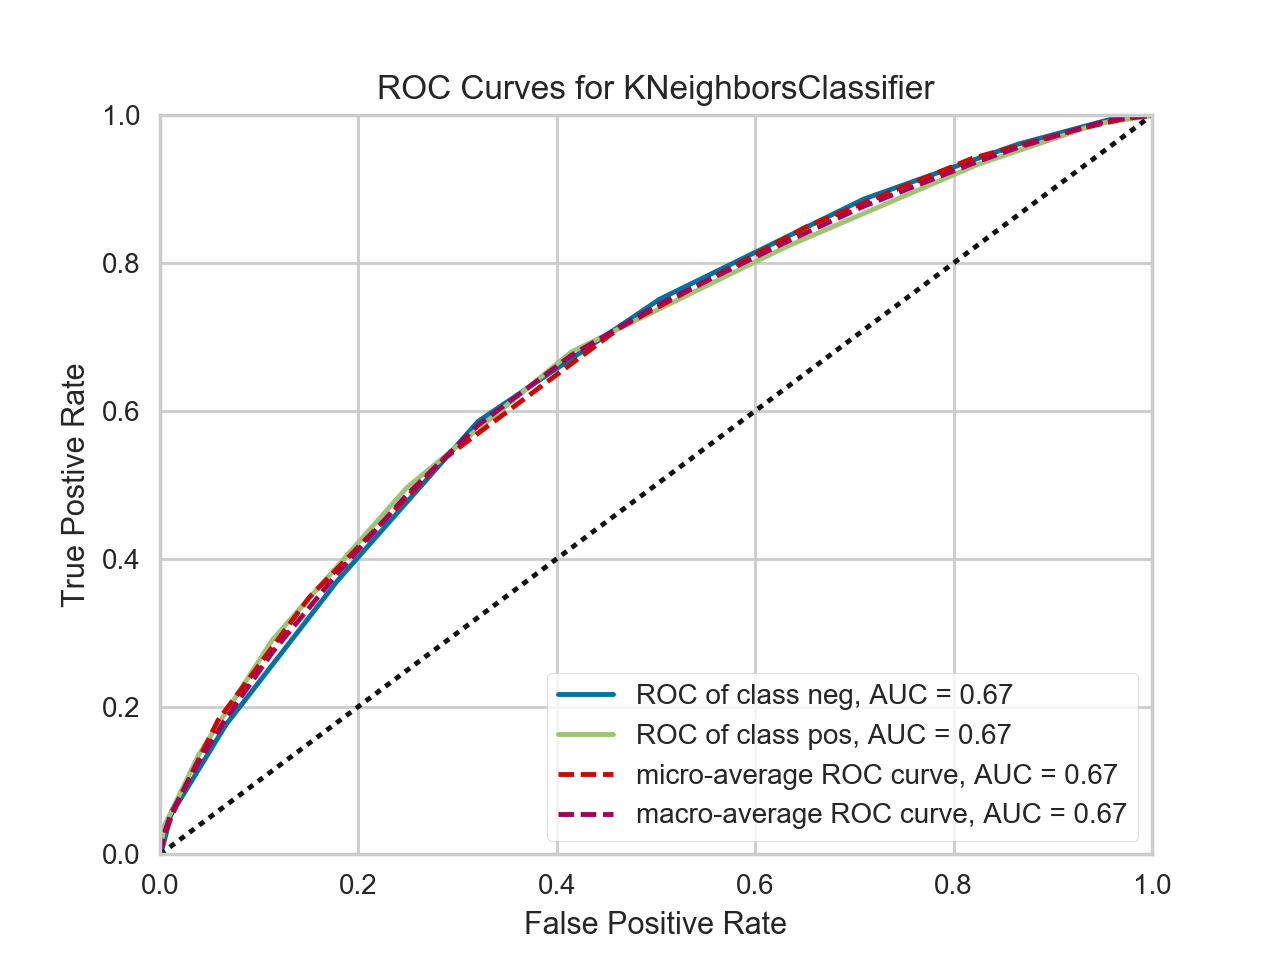

In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

visualizer = ROCAUC(KNeighborsClassifier(20))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [47]:
import nltk 

text = "I used to use a really primitive manual edger that I inherited from my father. Blistered hands and time wasted, I decided there had to be a better way and this is surely it.Edging is one of those necessary evils if you want a great looking house. I don't edge every time I mow. Usually I do it every other time. The first time out after a long winter, edging usually takes a little longer. After that, edging is a snap because you are basically in maintanence mode.I also use this around my landscaping and flower beds with equally great results.The blade on the Edge Hog is easily replaceable and the tell tale sign to replace it is when the edge starts to look a little rough and the machine seems slower."
tokens = list(nltk.pos_tag(nltk.word_tokenize(text)))

viz = PosTagVisualizer()
print(viz.transform(tokens))
print(' '.join((viz.colorize(token, color) for color, token in viz.tagged)))

I used to use a really primitive manual edger that I inherited from my father . Blistered hands and time wasted , I decided there had to be a better way and this is surely it.Edging is one of those necessary evils if you want a great looking house . I do n't edge every time I mow . Usually I do it every other time . The first time out after a long winter , edging usually takes a little longer . After that , edging is a snap because you are basically in maintanence mode.I also use this around my landscaping and flower beds with equally great results.The blade on the Edge Hog is easily replaceable and the tell tale sign to replace it is when the edge starts to look a little rough and the machine seems slower .
